# ML Nb. 11. Kernel SVM Classification
<hr>

### Compiled by Amit Purswani
LinkedIn: https://www.linkedin.com/in/amit-purswani-2a073777/
<hr>

<b>GitHub Repositories</b>
1. Data Analysis:
https://github.com/kranemetal/Data-Analysis-Projects

2. Machine Learning:
https://github.com/kranemetal/MachineLearning
<hr>

### Need for Kernel SVM Classification
- When the data is not linearly separable, we cannot classify it using simple SVM.
- For such data, we need to add another dimension to it, so that it becomes linearly separable.
- Kernel SVM can enable us to do the same.

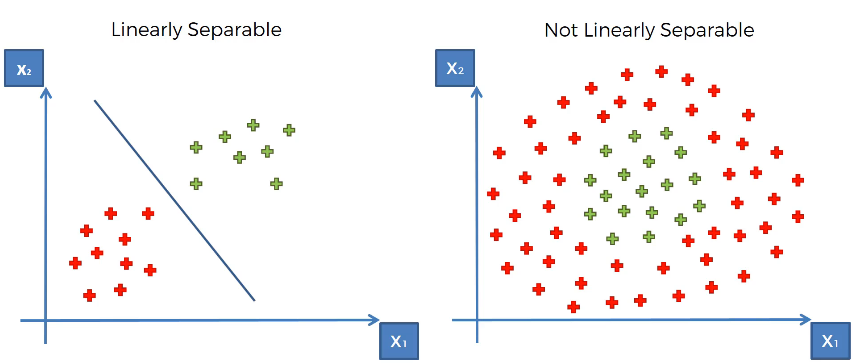

Image Credit: Ligency (SuperDataScience)

### Example 1
Below data points from 2 classes lying on the same line cannot be separated by another line
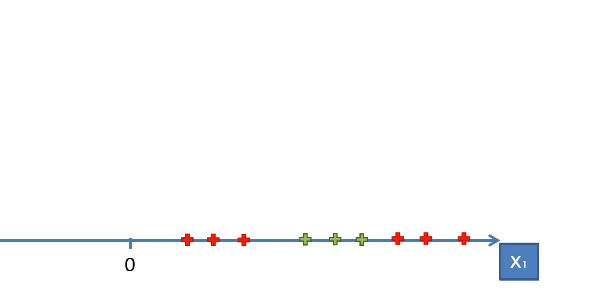

- If we apply a simple function on these points f(x) = (x-5)<sup>2</sup> i.e. subtract 5 and square the result.
- First the points will be shifted to left on number line because of subtraction and then raised because of square function as shown below.
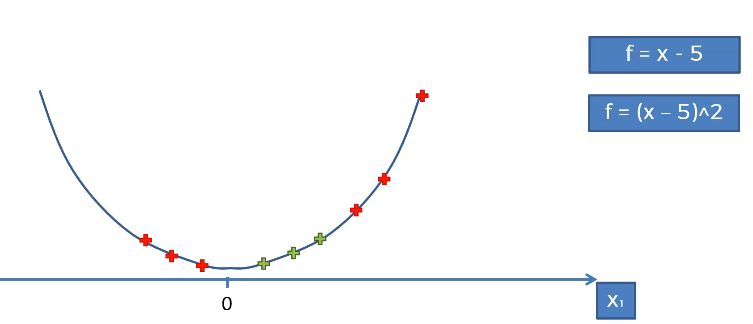

Now carefully observe that data points have become linearly separable, as shown in below picture.
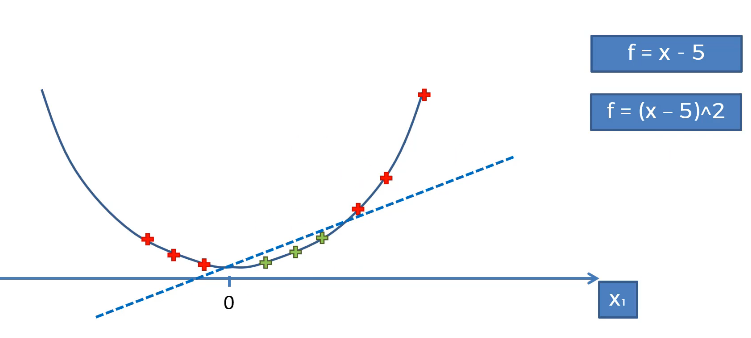

### Example 2
- Here is another example of data points which are not linerly separable but another dimension is added to them by a mapping function.
- So as to make them linearly separable in 3-dimensions. <br>
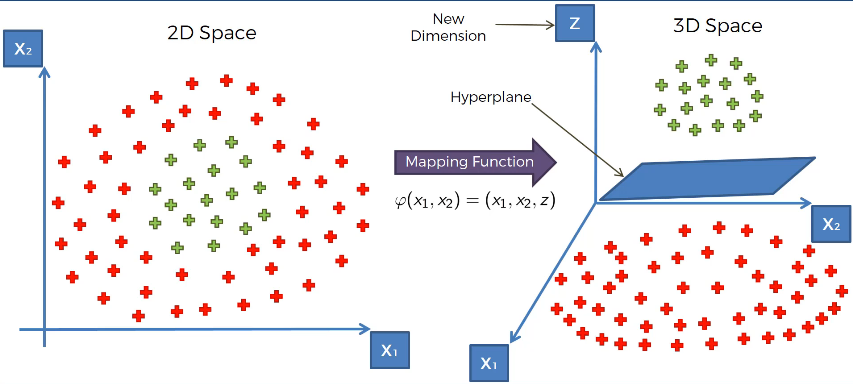

- After mapping the data points in 3-dimensional space, we again project them in a 2-dimensional space so as to separate/classify them.

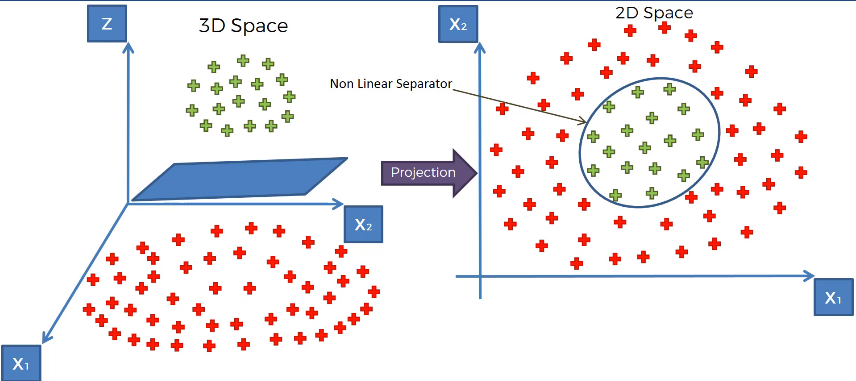


### Note:
Mapping to a higher dimensional space can be computationally intensive especially if the data-set is large and has several features. <hr>

### Gaussian Radial Basis Function (RBF) Kernel: The Go-To Kernel
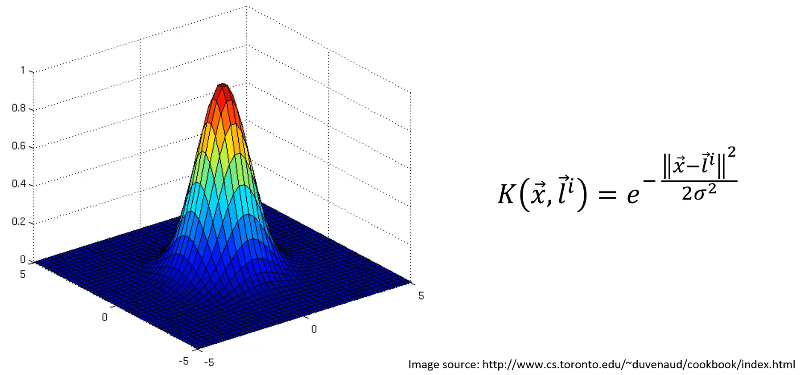

- Keeping in mind the visualisation show above, pay attention to the diagram below.
- Understand that we can transform the data points shown on the left side as 2-D to the 3-D shown on right side using the Gaussian RBF kernel trick, post which it becomes easy to classify them.
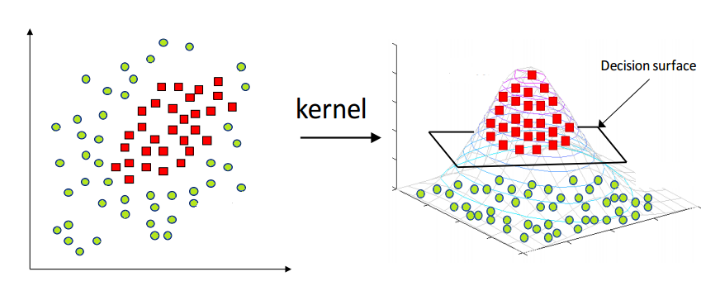
Image Credit: Siddhartha Sharma(analytics vidhya)

### Importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Import dataset

In [3]:
df = pd.read_csv('C:\\Users\krane\Desktop\datasets\Social_Network_Ads.csv')

### Basic checks on dataset

In [4]:
df.shape

(400, 3)

In [5]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [6]:
df.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [8]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


### Splitting independent variable X and dependent variable Y

In [9]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

### Splitting the train and test datasets

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state=0)

### Feature Scaling

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [12]:
print(x_train)

[[-1.1631724  -1.5849703 ]
 [ 2.17018137  0.93098672]
 [ 0.0133054   1.22017719]
 [ 0.20938504  1.07558195]
 [ 0.40546467 -0.48604654]
 [-0.28081405 -0.31253226]
 [ 0.99370357 -0.8330751 ]
 [ 0.99370357  1.8563962 ]
 [ 0.0133054   1.24909623]
 [-0.86905295  2.26126285]
 [-1.1631724  -1.5849703 ]
 [ 2.17018137 -0.80415605]
 [-1.35925203 -1.46929411]
 [ 0.40546467  2.2901819 ]
 [ 0.79762394  0.75747245]
 [-0.96709276 -0.31253226]
 [ 0.11134522  0.75747245]
 [-0.96709276  0.55503912]
 [ 0.30742485  0.06341534]
 [ 0.69958412 -1.26686079]
 [-0.47689368 -0.0233418 ]
 [-1.7514113   0.3526058 ]
 [-0.67297331  0.12125343]
 [ 0.40546467  0.29476771]
 [-0.28081405  0.06341534]
 [-0.47689368  2.2901819 ]
 [ 0.20938504  0.03449629]
 [ 1.28782302  2.20342476]
 [ 0.79762394  0.26584866]
 [-0.28081405  0.15017248]
 [ 0.0133054  -0.54388463]
 [-0.18277423  0.15017248]
 [-0.08473441  0.23692961]
 [ 0.0133054  -0.25469417]
 [ 2.17018137  1.104501  ]
 [-1.7514113   0.3526058 ]
 [ 1.87606192  0.12125343]
 

In [13]:
print(x_test)

[[-0.77101313  0.49720103]
 [ 0.0133054  -0.57280368]
 [-0.28081405  0.15017248]
 [-0.77101313  0.26584866]
 [-0.28081405 -0.57280368]
 [-1.06513258 -1.44037507]
 [-0.67297331 -1.5849703 ]
 [-0.18277423  2.14558666]
 [-1.94749093 -0.05226085]
 [ 0.89566375 -0.775237  ]
 [-0.77101313 -0.60172273]
 [-0.96709276 -0.42820845]
 [-0.08473441 -0.42820845]
 [ 0.11134522  0.20801057]
 [-1.7514113   0.46828198]
 [-0.5749335   1.36477242]
 [-0.08473441  0.20801057]
 [-1.84945111  0.43936294]
 [ 1.67998229  1.74072002]
 [-0.28081405 -1.38253697]
 [-0.28081405 -0.65956082]
 [ 0.89566375  2.14558666]
 [ 0.30742485 -0.54388463]
 [ 0.89566375  1.01774386]
 [-1.45729185 -1.2090227 ]
 [ 1.09174339  2.05882953]
 [-0.96709276  0.49720103]
 [-0.86905295  0.29476771]
 [-0.08473441 -0.22577513]
 [-0.5749335   0.46828198]
 [-1.65337148  0.52612008]
 [-0.08473441  0.26584866]
 [ 1.87606192 -0.28361322]
 [-0.08473441 -0.48604654]
 [-1.35925203 -0.34145131]
 [-1.94749093 -0.51496559]
 [-1.55533166  0.32368675]
 

### Train Kernel SVM model on train set

In [14]:
from sklearn.svm import SVC
classifier = SVC (kernel = 'rbf', random_state=0) #Using RBF Kernel
classifier.fit(x_train, y_train) 

SVC(random_state=0)

### Predicting a new result
For a customer aged 38 years and earning USD 86k

In [15]:
print(classifier.predict(sc.transform([[38,86000]])))

[0]


### Predicting the test results

In [16]:
y_pred = classifier.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]]


### Checking the confusion matrix and accuracy score

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred) #confusion matrix(actual, predicted)
print(cm)
accuracy_score(y_test, y_pred) #accuracy score (actual, predicted)

[[72  7]
 [ 4 37]]


0.9083333333333333

<b>Note:</b> Here correct predictions from two classes combined is 72+37=109 and incorrect predictions from two classes combined is 7+4=11.<br>
    Hence, the accuracy is 109/(109+11=120) = 90%.
    <hr>

### <center>The End